In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [35]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [36]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.069406,0.350532,-2.768286,-1.894282,-0.186392,0
1,-1.429418,-1.986800,0.079399,0.329330,-2.906749,1
2,0.170467,0.026176,1.589363,-0.844318,-2.144579,1
3,-1.276908,-0.899855,-2.032181,-0.731003,-1.184673,1
4,1.899473,1.610582,-0.296365,-1.061458,-1.274728,0


In [37]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [48]:
# function for feature sampling

def sample_features(df, percent, random_state=None):
    """
    Sample a given percentage of features from the DataFrame, excluding the target column.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    percent (float): The percentage of features to sample (between 0 and 1).
    random_state (int, optional): Seed for reproducibility. Default is None.
    
    Returns:
    pd.DataFrame: A new DataFrame with the sampled features and the target column.
    """
    if not 0 <= percent <= 1:
        raise ValueError("Percent must be between 0 and 1")
    
    if random_state is not None:
        random.seed(random_state)
    
    feature_cols = df.columns.tolist()[:-1]  # Exclude the last column assuming it's the target
    num_features = int(percent * (len(feature_cols)))
    
    sampled_cols = random.sample(feature_cols, num_features)
    
    new_df = df[sampled_cols].copy()  # Use .copy() to avoid SettingWithCopyWarning
    new_df['target'] = df['target'].values  # Use .values to avoid the warning
    
    return new_df

In [49]:
# function for combined sampling

def combined_sampling(df, row_percent, col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [65]:
# df1 = sample_rows(df,0.1)
# df1 = sample_features(df, 0.8)
df1 = combined_sampling(df,0.5,0.5)

In [66]:
# df2 = sample_rows(df,0.1)
# df2 = sample_features(df, 0.8)
df2 = combined_sampling(df,0.5,0.5)

In [67]:
# df3 = sample_rows(df,0.1)
# df3 = sample_features(df, 0.8)
df3 = combined_sampling(df,0.5,0.5)

In [68]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')
Index(['col5', 'col2', 'target'], dtype='object')


In [69]:
df1

,col1,col2,target
8,-0.774092,-2.711487,0
43,1.645071,1.149041,1
52,0.266276,1.352435,0
29,2.607553,3.365801,1
92,2.187626,2.136212,1
61,2.287863,1.920490,1
60,1.347574,1.151989,1
73,-0.199425,-0.256813,1
83,1.025485,-0.286937,0
20,0.056410,-0.625345,0


In [70]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [71]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [72]:
from sklearn.tree import plot_tree

[Text(0.6470588235294118, 0.9444444444444444, 'x[1] <= 2.045\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.5882352941176471, 0.8333333333333334, 'x[1] <= 1.2\ngini = 0.493\nsamples = 43\nvalue = [24, 19]'),
 Text(0.6176470588235294, 0.8888888888888888, 'True  '),
 Text(0.35294117647058826, 0.7222222222222222, 'x[1] <= -0.284\ngini = 0.495\nsamples = 31\nvalue = [14, 17]'),
 Text(0.17647058823529413, 0.6111111111111112, 'x[0] <= -0.141\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.11764705882352941, 0.5, 'x[0] <= -0.533\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.058823529411764705, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.17647058823529413, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23529411764705882, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5294117647058824, 0.6111111111111112, 'x[0] <= 0.2\ngini = 0.461\nsamples = 25\nvalue = [9, 16]'),
 Text(0.35294117647058826, 0.5, 'x[1] <= -0.

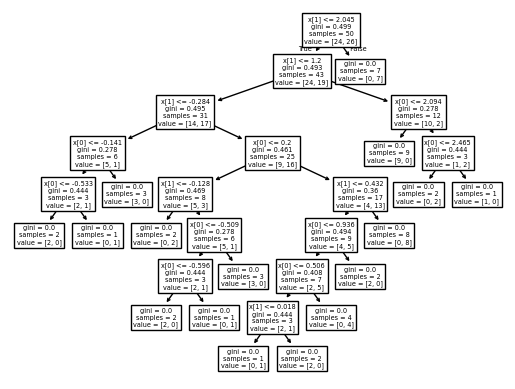

In [73]:
plot_tree(clf1)

[Text(0.5555555555555556, 0.9444444444444444, 'x[1] <= 0.325\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.4444444444444444, 0.8333333333333334, 'x[1] <= -2.363\ngini = 0.439\nsamples = 43\nvalue = [29.0, 14.0]'),
 Text(0.5, 0.8888888888888888, 'True  '),
 Text(0.2222222222222222, 0.7222222222222222, 'x[1] <= -3.001\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.1111111111111111, 0.6111111111111112, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.6111111111111112, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6666666666666666, 0.7222222222222222, 'x[0] <= 1.456\ngini = 0.327\nsamples = 34\nvalue = [27, 7]'),
 Text(0.5555555555555556, 0.6111111111111112, 'x[0] <= 0.359\ngini = 0.434\nsamples = 22\nvalue = [15.0, 7.0]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6666666666666666, 0.5, 'x[0] <= 0.77\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5555555555555556, 0.3888888888888889, 'gin

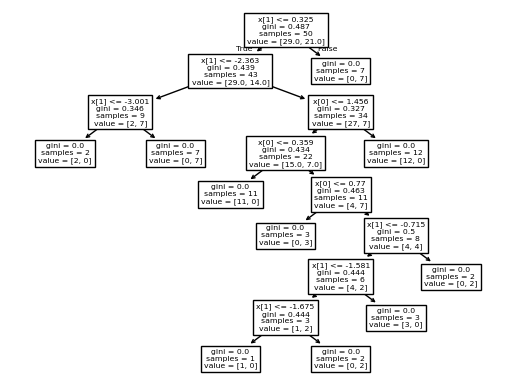

In [74]:
plot_tree(clf2)

[Text(0.453125, 0.95, 'x[0] <= 0.343\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.390625, 0.85, 'x[0] <= -2.363\ngini = 0.493\nsamples = 43\nvalue = [24, 19]'),
 Text(0.421875, 0.8999999999999999, 'True  '),
 Text(0.1875, 0.75, 'x[0] <= -3.22\ngini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.125, 0.65, 'x[1] <= 0.483\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.0625, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.65, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.59375, 0.75, 'x[1] <= 2.034\ngini = 0.42\nsamples = 30\nvalue = [21, 9]'),
 Text(0.53125, 0.65, 'x[1] <= -0.036\ngini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(0.3125, 0.55, 'x[1] <= -0.941\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.45, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.45, 'x[0] <= -1.966\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.3125, 0.35, 'x[0] <= -2.222\ngi

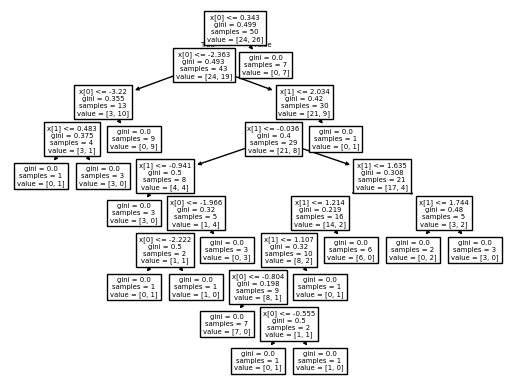

In [75]:
plot_tree(clf3)

In [76]:
# clf1.predict(np.array([-1.234408, -1.411228, -0.284715,	1.210808, -1.775197]).reshape(1,5))
# clf1.predict(np.array([-1.986800, -2.906749, 0.329330,0.079399]).reshape(1,4))
clf1.predict(np.array([1.645071, 1.149041]).reshape(1,2))

c:\Users\harsha s n\anaconda3\envs\advproj\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [77]:
# clf2.predict(np.array([-1.234408, -1.411228, -0.284715,	1.210808, -1.775197]).reshape(1,5))
# clf2.predict(np.array([-1.986800, -2.906749, 0.329330,0.079399]).reshape(1,4))
clf2.predict(np.array([1.645071, 1.149041]).reshape(1,2))

c:\Users\harsha s n\anaconda3\envs\advproj\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [78]:
# clf3.predict(np.array([-1.234408, -1.411228, -0.284715,	1.210808, -1.775197]).reshape(1,5))
# clf3.predict(np.array([-1.986800, -2.906749, 0.329330,0.079399]).reshape(1,4))
clf3.predict(np.array([1.645071, 1.149041]).reshape(1,2))

c:\Users\harsha s n\anaconda3\envs\advproj\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])